## 프랜차이즈 분석 


### 1. 소상공인시장진흥공단 상가업소 정보로 프랜차이즈 입점분석

- 프랜차이즈 매장이 얼마나 모여있는지 혹은 흩어져있는지 지도에 직접 표시해보면서 대용량 데이터에서 원하는 특정 데이터를 추출 해보는 실습

#### 1.1 필요라이브러리 및 데이터 로드

In [2]:
#라이브러리 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#구버전의 주피터에서 그래프가 보이는 설정 
%matplotlib inline

In [3]:
#시각화를 위한 한글 폰트 설정 

plt.rc ('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

#글씨색 진하게 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\김선림\AppData\Local\Temp\ipykernel_8252\980726876.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
# 데이터 가져오기 
%ls data_apt


df = pd.read_csv('data_apt/상가상권정보/상가업소정보_201912_01.csv', sep='|')
df.shape

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 866A-7EEA

 C:\Users\김선림\data_apt 디렉터리

2022-09-07  오전 12:42    <DIR>          .
2022-09-07  오전 12:42    <DIR>          ..
2022-09-07  오전 12:42    <DIR>          상가상권정보
2022-09-07  오전 12:42    <DIR>          전국도시공원표준데이터
2022-09-07  오전 12:42    <DIR>          전국신규민간아파트분양가격동향
               0개 파일                   0 바이트
               5개 디렉터리  440,361,717,760 바이트 남음


(573680, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [6]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

<AxesSubplot:>

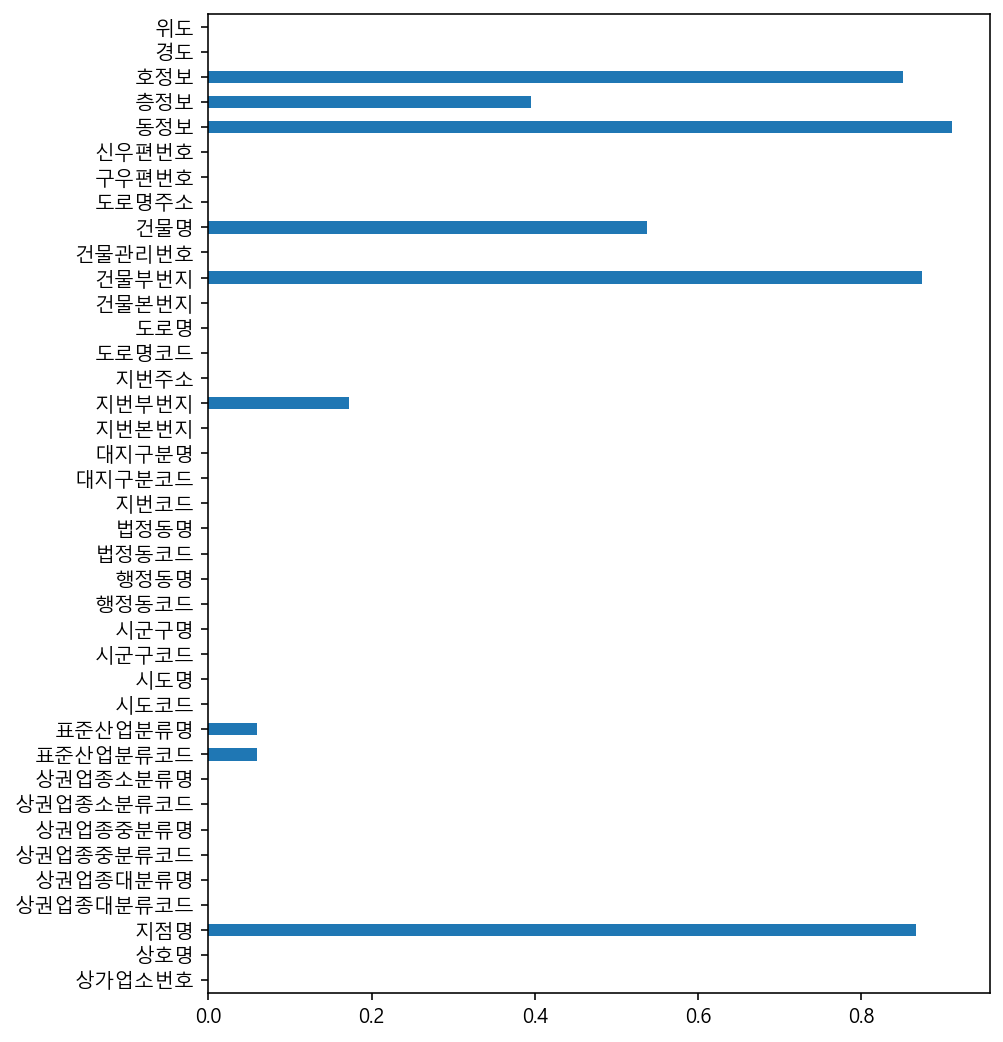

In [7]:
df.isnull().mean().plot.barh(figsize=(7,9))


In [8]:
##사용하지 않는 컬럼 제거

#사용할 컬럼만 모으기
columns=['상호명','상권업종대분류명','상권업종중분류명', '상권업종소분류명',
         '시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도'
    ]
df=df[columns].copy()

In [9]:
df.shape
#39개였던 컬럼 11개로 정리 

(573680, 11)

### 2. 색인으로 서브셋 가져오기

#### 2.1 서울만 따로 보기

In [10]:
#시도명이 서울로 시작하는 데이터만 보기 
df_seoul= df[df['시도명'] =='서울특별시'].copy()

df_seoul.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [11]:
#중복을 제거한 시군구명 가져오기 

df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [12]:
#시군구명 25개
df_seoul['시군구명'].nunique()

25

### 3. 파일로 저장하기 

In [13]:
#seoul_open_store로 파일 저장해보기
df_seoul.to_csv('seoul_open_store.csv',index=False)

In [14]:
#저장된 파일 확인 
pd.read_csv('seoul_open_store.csv').head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


### 3. 베스킨라빈스, 던킨 도너츠 위치 분석

#### 3.1 특정 상호만 가져오기

In [15]:
#문자열의 소문자로 변경하는 메소드 사용

df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [16]:
#베스킨라빈스 추출
df_seoul[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins')].shape

(466, 12)

In [17]:
#던킨 추출 
#상호면 소문자만 loc로 추출 해서 확인 
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'), '상호명_소문자']

1167              던킨도너츠
1819        던킨도너츠테크노마트점
2305         던킨도너츠창동하나로
2342      던킨도너츠용산민자역사2호
3007              던킨도너츠
              ...      
553907            던킨도너츠
554211            던킨도너츠
558894    dunkindoonuts
560984            던킨도너츠
569825            던킨도너츠
Name: 상호명_소문자, Length: 191, dtype: object

In [18]:
#베스킨과 던킨만 가져와 df_31에 담기

df_31=df_seoul[df_seoul['상호명_소문자'].str.contains('베스킨라빈스|배킨라빈스|baskinrobbins|베스킨|배스킨|baskin|던킨|dunkin')].copy()
df_31.shape

(659, 12)

In [19]:
##브랜드명에 배스킨라빈스 넣기 
df_31.loc[df_31['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins'),'브랜드명']='배스킨라빈스'

df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [20]:
#남은 열에 던킨 도너츠 넣기
df_31['브랜드명']=df_31['브랜드명'].fillna('던킨도너츠')
df_31['브랜드명']

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 659, dtype: object

In [21]:
#데이터 제대로 모아졌는지 확인 
df_31['상권업종대분류명'].value_counts()

#음식은 맞는데 소매, 생활서비스는 아닌것 같음

음식       657
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [22]:
df_31[df_31['상권업종대분류명'].isin(['소매','생활서비스'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [23]:
# 소매, 생활서비스는 제거 

df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매','생활서비스'])].copy()
df_31.shape

(657, 13)

#### 3.2 범주형 값으로 countplot 그리기 

In [24]:
#브랜드명 빈도수 구하기
brand_count=df_31['브랜드명'].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     193
Name: 브랜드명, dtype: int64

<AxesSubplot:>

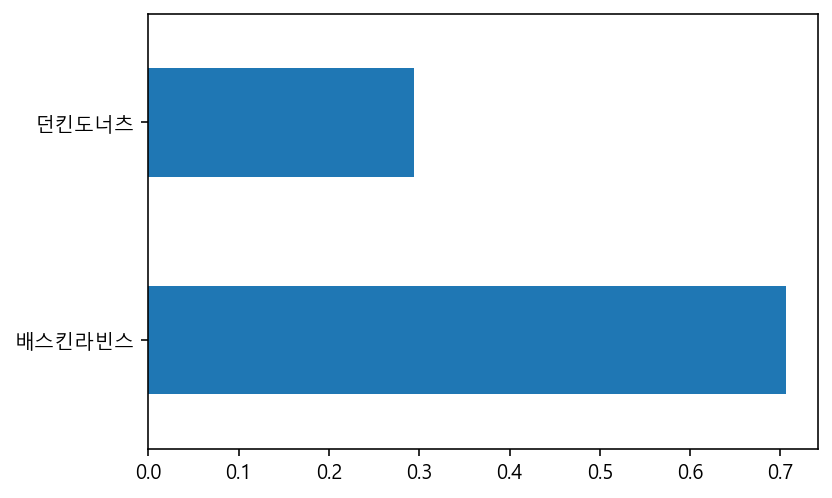

In [25]:
#빈도수 비율 구하기 noramlize=True

df_31['브랜드명'].value_counts(normalize=True).plot.barh()

Text(1, 193, '193')

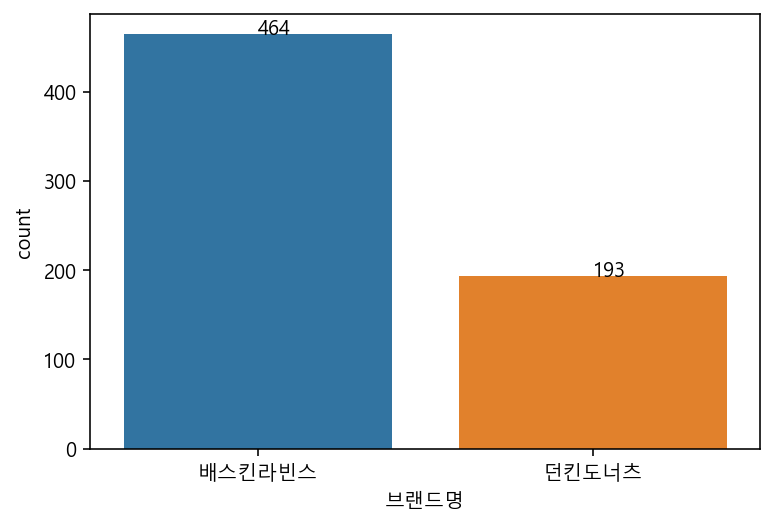

In [26]:
#countplot그리기 
g=sns.countplot(data=df_31,x='브랜드명')

g.text(x=0,y=brand_count[0],s=brand_count[0]) #베스킨
g.text(x=1,y=brand_count[1],s=brand_count[1]) #던킨

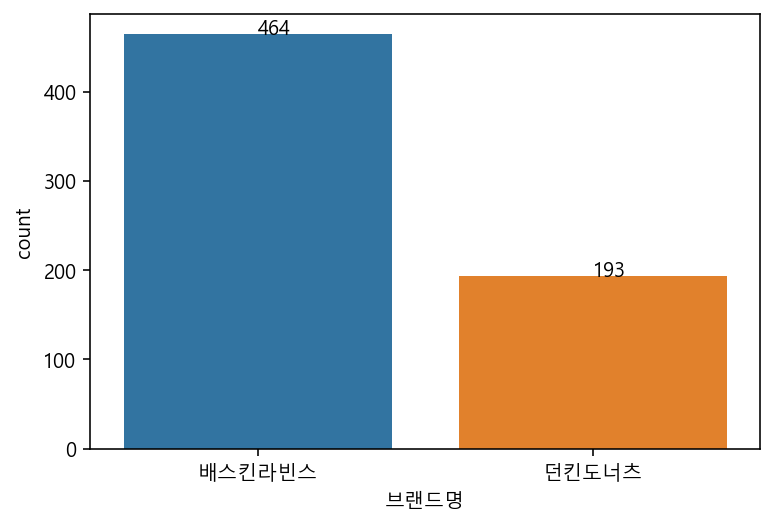

In [27]:
g=sns.countplot(data=df_31,x='브랜드명')

for i,val in enumerate(brand_count.index):
    g.text(x=i,y=brand_count[i],s=brand_count[i]) 


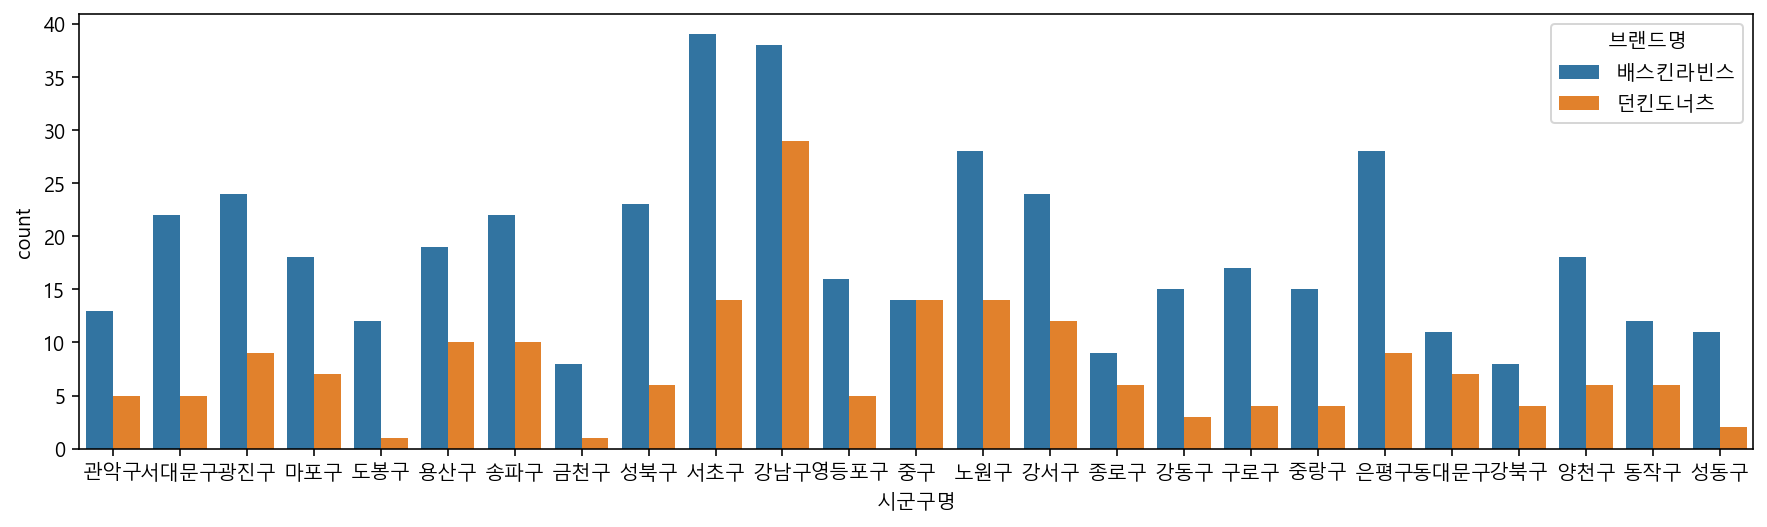

In [28]:
#시군구명 countplot으로 그리기 
plt.figure(figsize=(15,4))
g=sns.countplot(data=df_31, x='시군구명',hue='브랜드명')

#### 3.3 scatterplot그리기

<AxesSubplot:xlabel='경도', ylabel='위도'>

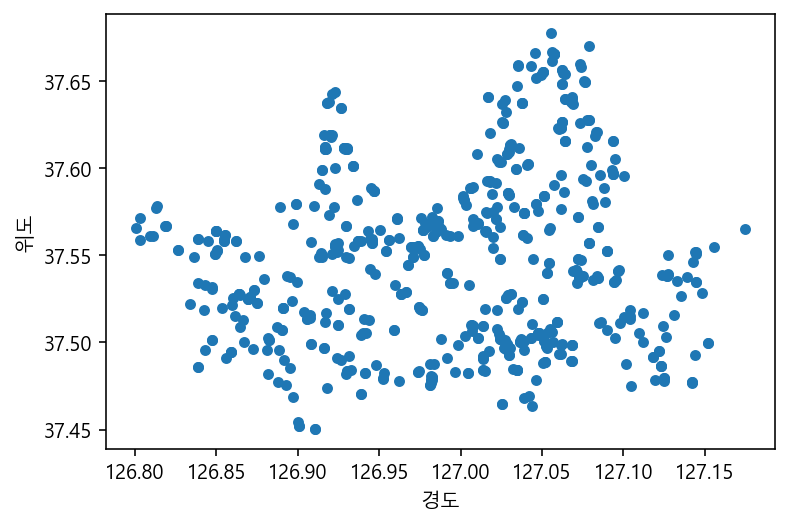

In [29]:
df_31[['위도','경도']].plot.scatter(x='경도',y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

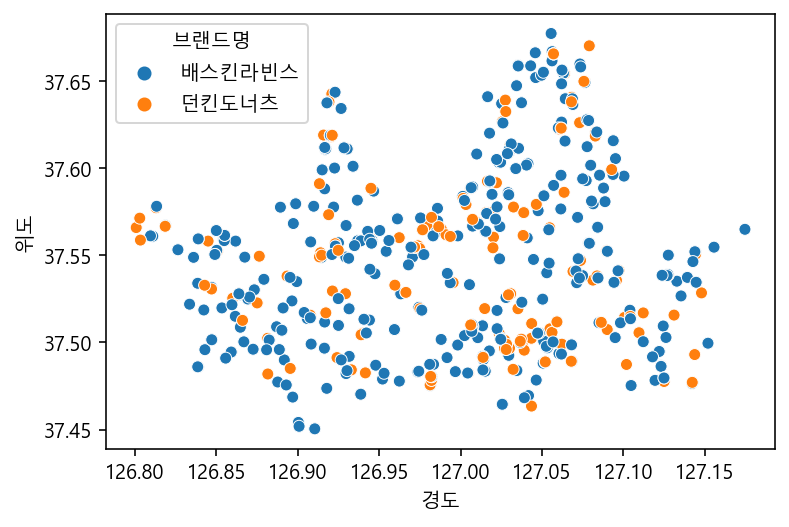

In [30]:
sns.scatterplot(data=df_31,x='경도',y='위도',hue='브랜드명')

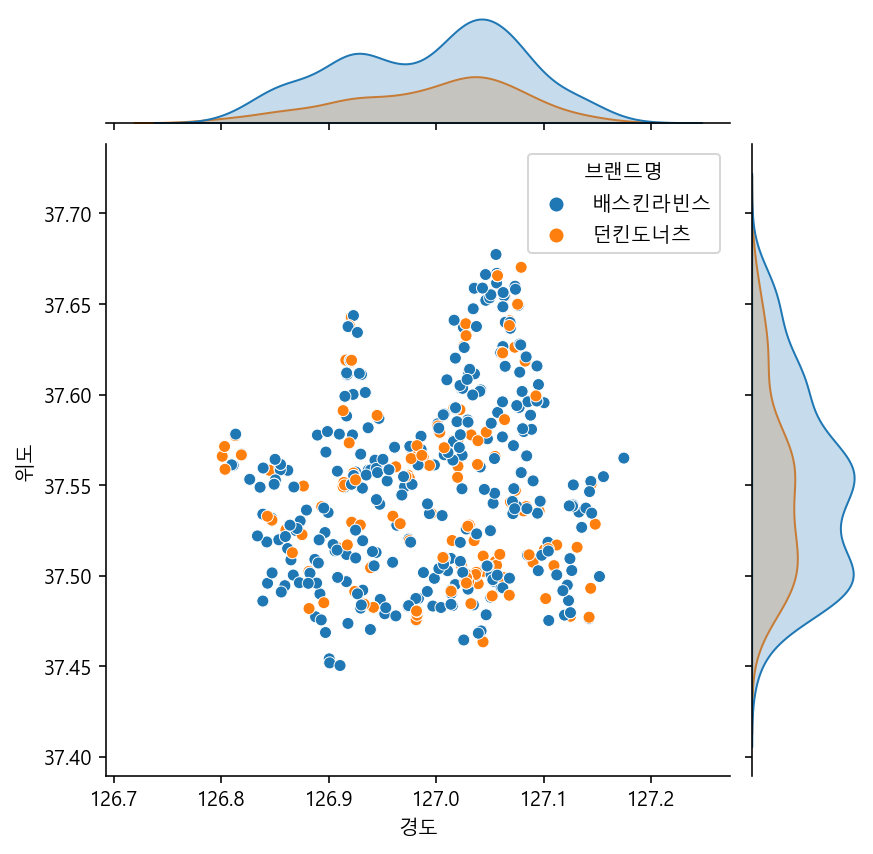

In [31]:
sns.jointplot(data=df_31,x='경도',y='위도',hue='브랜드명')

### 4. Folium으로 지도 활용하기

In [32]:
import folium 

In [33]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균을 구해야함 
lat=df_31['위도'].mean()
long=df_31['경도'].mean()

In [91]:
#지도에 표시 
m=folium.Map([lat,long])
m

In [35]:
df_31.sample(random_state=31)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
355666,배스킨라빈스31건대동문회관점,음식,패스트푸드,아이스크림판매,서울특별시,광진구,자양3동,자양동,서울특별시 광진구 아차산로36길 5,127.074625,37.538335,배스킨라빈스31건대동문회관점,배스킨라빈스


In [36]:
# 위의 샘플을 추출해서 지도에 표시 

m=folium.Map([lat,long])
-

folium.Marker(
    [37.538335, 127.074625], popup='<i>던킨도너츠</i>',
    tooltip="던킨도너츠").add_to(m)

m

#### 4.1 베라와 던킨 매장분포

In [37]:
#인덱스만 추출
df_31.index

#인덱스를 하나씩 돌면서 마커하기 

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   2652,   3007,
             11060,  13042,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=657)

In [38]:
#이런 식으로 for문으로 인덱스 돌게하기 
for i in df_31.index:
    print(i)

76
1167
1819
2164
2305
2342
2652
3007
11060
13042
13925
13953
14188
14201
14242
14295
14411
15443
15512
15701
15730
15940
24841
25981
36998
37080
39819
43418
45155
45929
45990
47952
56208
56292
59662
62553
65063
65901
67954
68832
69071
69384
71018
71161
76178
76454
79328
85187
85885
86884
90796
91737
95648
96603
100276
100644
100743
105329
108295
111688
112507
115604
116034
116343
116667
117313
117758
120732
121030
124045
124757
126853
129372
130286
134284
138098
140050
140515
140869
140941
141000
147717
148748
149416
151258
151450
151741
156118
156491
157286
157604
159582
160611
160628
160823
160860
161181
161209
161700
163136
163951
164631
165258
167949
169427
170103
170603
175300
175529
176415
176864
177097
177728
177890
178468
178632
178842
179165
179547
179739
179840
179970
180317
183494
187119
188343
188344
189036
191245
192412
195256
198139
199952
200104
204960
205369
207140
207195
209451
210727
211575
212758
213831
217616
217621
218338
222107
222678
235868
241660
243204
243699


In [39]:
#10개만 추출해보기 
m=folium.Map([lat,long], zoom_start=12)

for i in df_31.index[:100]:
    
    sub_lat=df_31.loc[i,'위도']
    sub_long=df_31.loc[i,'경도']
    title = df_31.loc[i,'상호명']+"-"+df_31.loc[i,'도로명주소']
    
    icon_color ='blue'
    if df_31.loc[i,'브랜드명']=='던킨도너츠':
        icon_color ='red'
    
    folium.Marker(
               
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)
    
m



#### 4.2 MarkerCluster로 표현하기

In [92]:
#마커클러스터 임포트

from folium.plugins import MarkerCluster


m=folium.Map([lat,long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index[:100]:
    
    sub_lat=df_31.loc[i,'위도']
    sub_long=df_31.loc[i,'경도']
    title = df_31.loc[i,'상호명']+"-"+df_31.loc[i,'도로명주소']
    
    icon_color ='blue'
    if df_31.loc[i,'브랜드명']=='던킨도너츠':
        icon_color ='red'
    
    folium.Marker(
               
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)
    
m

#클러스터된 마커 맵이 표시가 됨 

### 5. 파리바게뜨와 뚜레쥬르 분석하기

#### 5.1  데이터 색인으로 가져오기

In [48]:
#str.contains을 사용해서 상호명 찾기 


df_bread=df_seoul[df_seoul['상호명'].str.contains('뚜레(주|쥬)르|파리(바게|크라상)')].copy()
df_bread.shape

#copy 잊지말고 ! 원데이터에 영향을 미치지 않고 새로운 데이터를 만들떄 사용

C:\Users\김선림\AppData\Local\Temp\ipykernel_8252\3194965395.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_bread=df_seoul[df_seoul['상호명'].str.contains('뚜레(주|쥬)르|파리(바게|크라상)')].copy()


(825, 12)

#### 5.2 가져온 데이터가 맞는지 확인


In [50]:
df_bread['상권업종대분류명'].value_counts()

#제과와 상관없을 학문/교육 없애기

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [53]:
df_bread= df_bread[df_bread['상권업종대분류명']!='학문/교육'].copy()

print(df_bread.shape)

#2개의 값이 빠진 값이 출력 

(823, 12)


In [54]:
df_bread['상호명'].unique

<bound method Series.unique of 2935             뚜레쥬르
13843            뚜레쥬르
14031     파리바게뜨길동사거리점
14229      파리바게뜨상계제일점
14246       뚜레쥬르중계브라운
             ...     
559820          파리바게뜨
561538          파리바게뜨
561810          파리바게뜨
569327          파리바게뜨
569479          파리바게뜨
Name: 상호명, Length: 823, dtype: object>

In [56]:
#상호명이 파스구찌 |잠바주스가 아닌것 가져오기 
df_bread=df_bread[-df_bread['상호명'].str.contains('파스구찌|잠바주스')].copy()
print(df_bread.shape)

(819, 12)


In [60]:
#브랜드명 컬럼 만들기 

#'파리바게뜨'새로운 컬럼만들기 loc를 이용할 것

df_bread.loc[df_bread['상호명'].str.contains('파리바게'),'브랜드명']='파리바게뜨'
df_bread[['상호명','브랜드명']].head()

,상호명,브랜드명
2935,뚜레쥬르,NaN
13843,뚜레쥬르,NaN
14031,파리바게뜨길동사거리점,파리바게뜨
14229,파리바게뜨상계제일점,파리바게뜨
14246,뚜레쥬르중계브라운,NaN


In [61]:
# 브랜드명의 결측치는 뚜레쥬르이기때문에 fillna를 사용해서 값채우기
df_bread['브랜드명']=df_bread['브랜드명'].fillna('뚜레쥬르')
df_bread[['상호명','브랜드명']].head()

,상호명,브랜드명
2935,뚜레쥬르,뚜레쥬르
13843,뚜레쥬르,뚜레쥬르
14031,파리바게뜨길동사거리점,파리바게뜨
14229,파리바게뜨상계제일점,파리바게뜨
14246,뚜레쥬르중계브라운,뚜레쥬르


#### 5.3 범주형 변수 빈도수 구하기

In [63]:
#브랜드명 빈도수 보기 
df_bread['브랜드명'].value_counts()

파리바게뜨    515
뚜레쥬르     304
Name: 브랜드명, dtype: int64

In [65]:
#비율로보기
df_bread['브랜드명'].value_counts(normalize=True)

파리바게뜨    0.628816
뚜레쥬르     0.371184
Name: 브랜드명, dtype: float64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

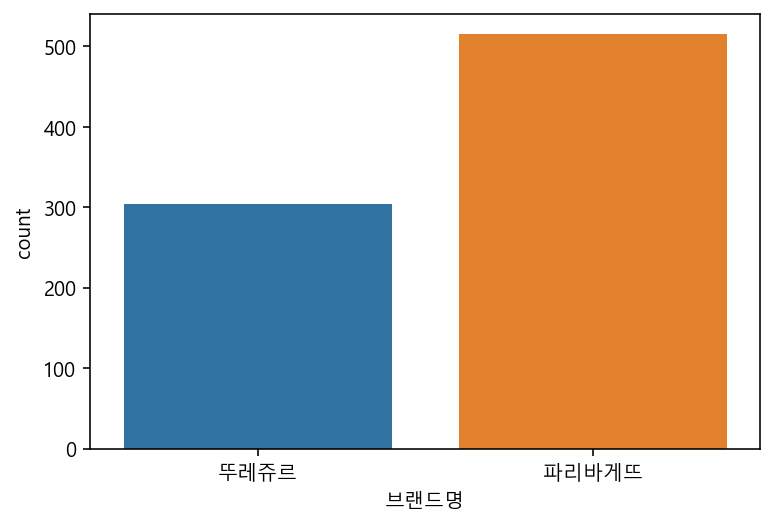

In [66]:
#countplot으로 브랜드명 그리기 
sns.countplot(data=df_bread, x='브랜드명')

<AxesSubplot:xlabel='시군구명', ylabel='count'>

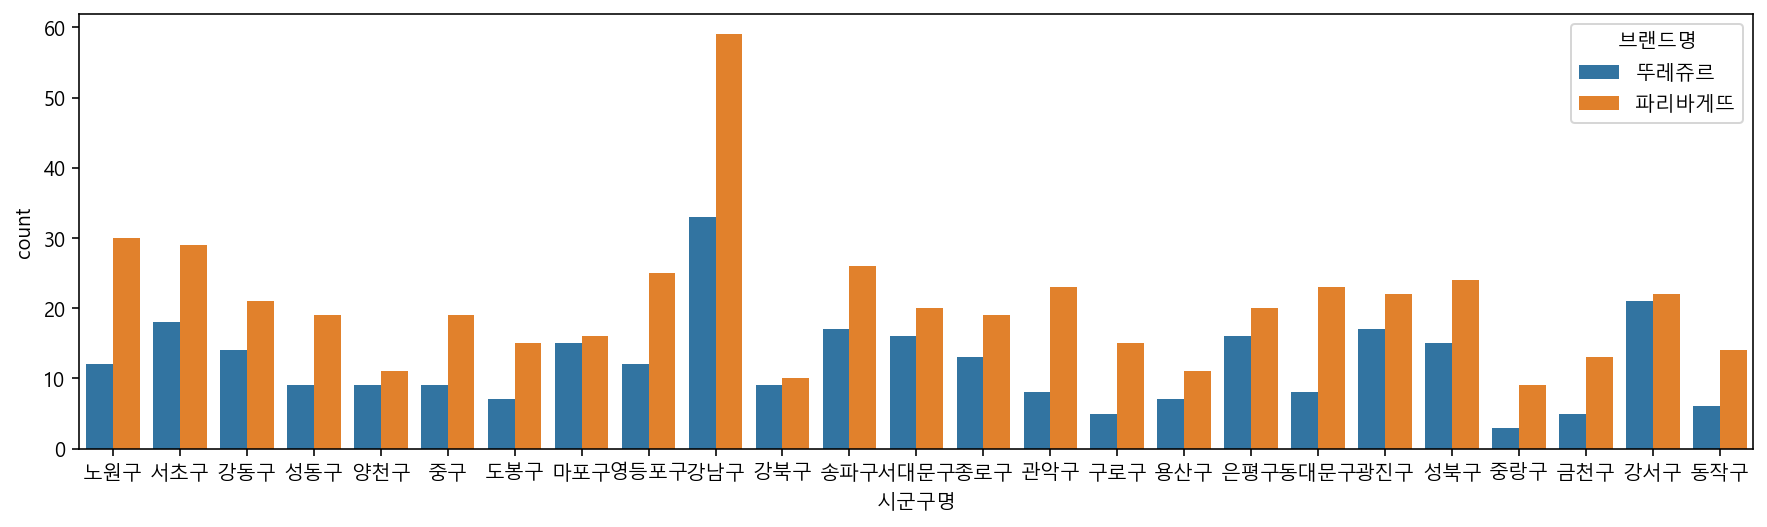

In [67]:
#시군구별로 브랜드명의 빈도수 차이 비교 
plt.figure(figsize=(15,4))
sns.countplot(data=df_bread, x='시군구명',hue='브랜드명')


<AxesSubplot:xlabel='경도', ylabel='위도'>

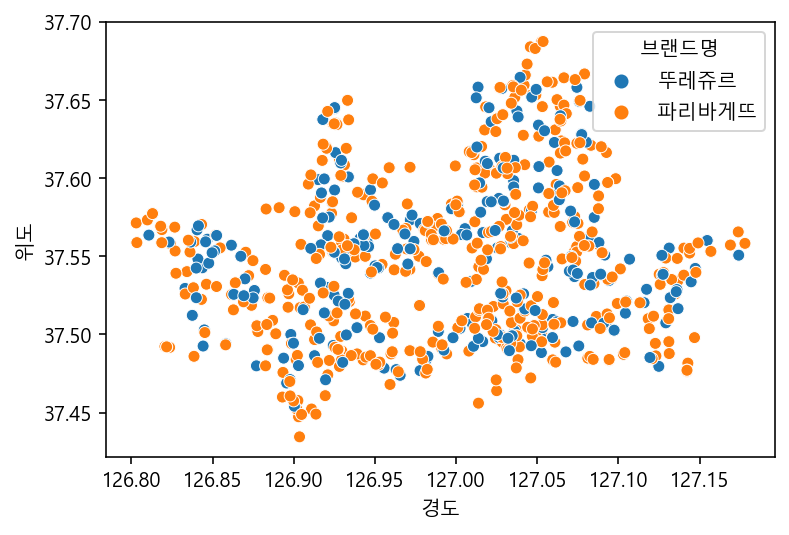

In [69]:
#위경도 표현 

sns.scatterplot(data=df_bread, x='경도',y='위도',hue='브랜드명')

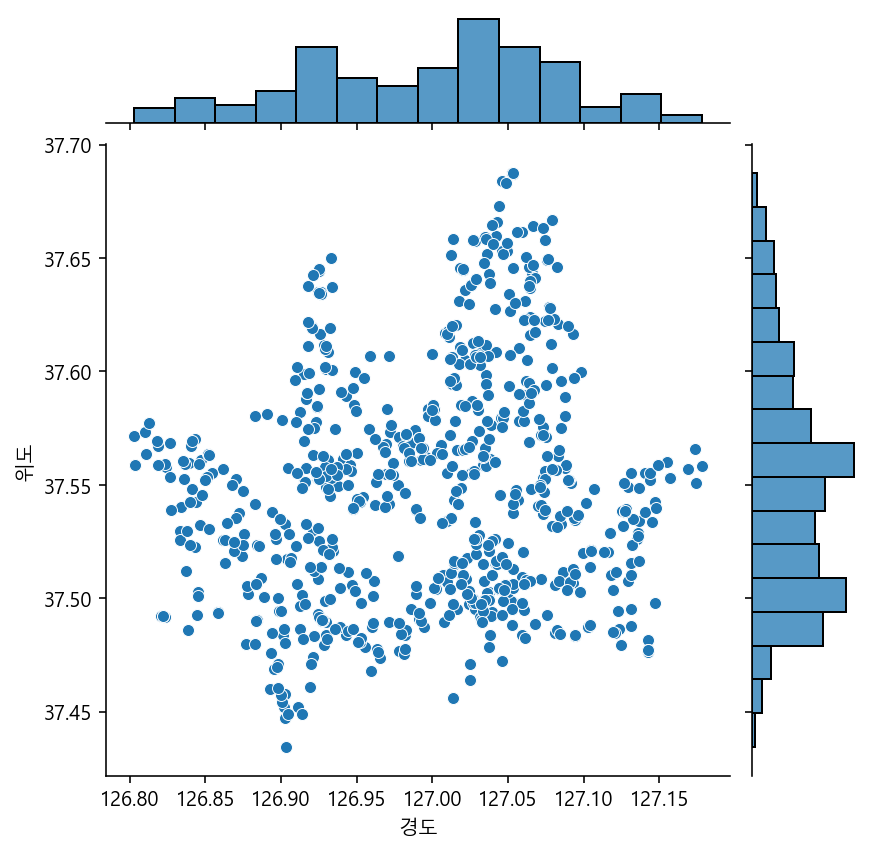

In [70]:
#joinplot으로 위경도 표현 
sns.jointplot(data=df_bread,x='경도',y='위도')

### 6.지도에 표현하기

In [71]:
df_bread.index

Int64Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,
             14897,  15019,
            ...
            544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810,
            569327, 569479],
           dtype='int64', length=819)

In [72]:
df_bread.loc[2935,'위도']
#2935는 뚜레쥬르임, loc를 활용하면 해당하는 데이터를 가져올수 있음

37.6282888149588

In [73]:
for i in df_bread.index:
    print(i)
    #위경도값 하나하나 출력 가능

2935
13843
14031
14229
14246
14713
14842
14889
14897
15019
15075
15210
15295
15308
15313
15932
21076
21098
29050
29756
32976
34846
37488
40363
44665
52769
55142
67512
72200
87075
88167
89741
110250
113801
127482
129359
129476
135663
138210
140703
142629
147219
149653
149962
150108
150916
159501
162889
164411
164856
165698
166524
166853
166854
166894
167366
167711
167937
168353
169336
171022
171755
173293
173389
174333
175508
175761
182862
186608
187749
187981
189464
190647
191338
191900
192027
192163
192752
195070
196818
200552
201124
201162
201254
202723
202830
203299
204549
204649
204690
205108
206922
207957
207997
208552
209289
209292
209311
210514
213906
214127
214162
214251
214388
216658
217070
217580
218007
220102
221211
221751
221797
222152
222321
222328
222405
226807
227436
227505
227540
227900
228823
230578
230665
230669
231267
231593
231802
235081
237546
237864
237998
238152
239434
239463
240390
241097
241507
242005
243714
243715
244224
244238
244297
244746
244793
245329
2454

In [82]:

m=folium.Map([lat,long],zoom_start=12)

for i in df_bread.index:
    sub_lat=df_bread.loc[i,'위도']
    sub_long=df_bread.loc[i,'경도']
    
    title=df_bread.loc[i,'상호명'] + '-'+df_bread.loc[i,'도로명주소']
    icon_color='blue'
    if df_bread.loc[i,'브랜드명']=='뚜레쥬르':
        icon_color='green'
  



    folium.CircleMarker(
        [sub_lat, sub_long],
        radius=3,
        color=icon_color,
        #con=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)

m

#### 6.1 마커 클러스터



In [83]:
#마커클러스터 임포트

from folium.plugins import MarkerCluster


m=folium.Map([lat,long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index[:100]:
    
    sub_lat=df_31.loc[i,'위도']
    sub_long=df_31.loc[i,'경도']
    title = df_31.loc[i,'상호명']+"-"+df_31.loc[i,'도로명주소']
    
    icon_color ='blue'
    if df_31.loc[i,'브랜드명']=='뚜레쥬르':
        icon_color ='red'
    
    folium.Marker(
               
        [sub_lat, sub_long],
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)
    
m


### 6.2 Heatmap그리기

In [89]:
#히트맵은 데이터 2차원 배열 만들기

heat=df_bread[['위도','경도','브랜드명']].copy()
#브랜드명 숫자값으로 만들어주기
heat['브랜드명']= heat['브랜드명'].replace('뚜레쥬르',1).replace('파리바게뜨',2)
heat=heat.values

In [90]:

from folium.plugins import HeatMap


m=folium.Map([lat,long], zoom_start=12)

HeatMap(heat).add_to(m)

m
